# Jupyter Notebook for Statistical Concepts: A Meta Data Science Focus

**Introduction:**

This Jupyter Notebook is designed to augment and enhance your understanding of statistical concepts crucial for success in data science roles, particularly within the context of companies like Meta. It covers a range of topics, from descriptive statistics and probability distributions to hypothesis testing, regression, and experimental design. Each concept is explained briefly and then demonstrated with Python code and visualizations.

This notebook is intended for learning and exploration. It's crucial to remember that real-world data analysis often involves complex scenarios and requires deeper investigation beyond the basic examples presented here.

**Note:** This is an introductory exploration. For a deeper understanding, it's recommended to consult statistical textbooks, online courses, and engage in hands-on data science projects. *The code and examples are for illustrative purposes and may need adaptation for specific datasets and analytical tasks.*

## Table of Contents

1.  [Foundational Descriptive Statistics](#descriptive-statistics)
    *   [1.1 Measures of Central Tendency (Mean, Median, Mode)](#measures-of-central-tendency)
    *   [1.2 Measures of Dispersion (Range, Variance, Standard Deviation, IQR)](#measures-of-dispersion)
    *   [1.3 Percentiles and Quantiles](#percentiles-and-quantiles)
    *   [1.4 Data Distributions (Histograms, Density Plots, Skewness, Kurtosis)](#data-distributions)
    *   [1.5 Data Transformation (Standardization, Normalization, Log Transformation)](#data-transformation)

2.  [Probability Fundamentals](#probability-fundamentals)
    *   [2.1 Probability Basics (Conditional Probability, Bayes' Theorem)](#probability-basics)
    *   [2.2 Discrete Distributions (Bernoulli, Binomial, Poisson)](#discrete-distributions)
    *   [2.3 Continuous Distributions (Normal, Exponential, Uniform)](#continuous-distributions)
    *  [2.4 Central Limit Theorem](#central-limit-theorem)

3.  [Hypothesis Testing & Statistical Inference](#hypothesis-testing-statistical-inference)
     *   [3.1 Hypothesis Testing Framework (Null/Alternative Hypotheses, Type I/II Errors)](#hypothesis-testing-framework)
     *  [3.2 P-values and Significance Levels](#p-values-and-significance-levels)
    *    [3.3 Confidence Intervals](#confidence-intervals)
    *    [3.4 Statistical Power and Sample Size](#statistical-power-and-sample-size)
    *   [3.5 One-Sample Tests (t-test, z-test)](#one-sample-tests)
    *   [3.6 Two-Sample Tests (Independent/Paired t-test, Chi-square)](#two-sample-tests)
    *   [3.7 A/B Testing](#ab-testing)

4.  [Correlation](#correlation)
    *   [4.1 Correlation (Pearson and Spearman)](#correlation-pearson-and-spearman)

5.  [Regression Analysis](#regression-analysis)
    *   [5.1 Linear Regression (Simple and Multiple)](#linear-regression-simple-and-multiple)
    *   [5.2 Logistic Regression](#logistic-regression)
    *   [5.3 Regularization (L1/L2)](#regularization)

6.  [Experimental Design & Causal Inference](#experimental-design-causal-inference)
    *   [6.1 Experimental Design Principles (Randomization, Control/Treatment Groups)](#experimental-design-principles)
    *   [6.2 A/B Testing in Social Networks (Network/Spillover Effects, Clustering)](#ab-testing-in-social-networks)
    *   [6.3 Observational Studies vs. Experiments](#observational-studies-vs-experiments)

7.  [Resampling Techniques](#resampling-techniques)
    *   [7.1 Resampling Techniques (Bootstrapping, Cross-Validation)](#resampling-techniques-methods)

8.  [Bias-Variance Tradeoff](#bias-variance-tradeoff)
    *   [8.1 Bias-Variance Tradeoff](#bias-variance-tradeoff)



## 1. Descriptive Statistics <a name="descriptive-statistics"></a>

**Explanation:**

Descriptive statistics provide a concise summary of the main features of a dataset. In product analytics, these are essential for understanding user behavior, identifying trends, and detecting anomalies. Key metrics include:

*   **Measures of Central Tendency (Mean, Median, Mode):** Describe the "typical" value in a dataset. Useful for understanding average user engagement, average purchase value, etc. The median is robust to outliers, making it useful when data is skewed.
*   **Measures of Dispersion (Range, Variance, Standard Deviation, IQR):** Describe the spread or variability of the data. Important for understanding the consistency of user behavior, identifying outliers, and assessing the reliability of averages.
*   **Percentiles and Quantiles:** Divide the data into equal parts. Useful for segmenting users based on behavior (e.g., top 10% of engaged users) or understanding the distribution of metrics like session duration.

**Takeaway for Product Analytics:** Understanding the distribution of key metrics like user engagement, retention, and conversion rates is crucial for identifying areas for product improvement and measuring the impact of changes.


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set plotting style
sns.set_style("whitegrid")

# Synthetic Data Generation
np.random.seed(42)  # for reproducibility
sample_size=4000

# Normal distribution
normal_data = np.random.normal(loc=15, scale=5, size=sample_size)
normal_data = np.clip(normal_data, 0, None)

# Right-skewed data
right_skewed_data = np.random.exponential(scale=5, size=sample_size)
right_skewed_data = np.clip(right_skewed_data, 0, None)

# Left-skewed data
left_skewed_data = 20 - np.random.exponential(scale=5, size=sample_size)
left_skewed_data = np.clip(left_skewed_data, 0, 20)

data_sets = {
    "Normal": normal_data,
    "Right-Skewed": right_skewed_data,
    "Left-Skewed": left_skewed_data
}

# Create a Pandas DataFrame to store the descriptive statistics
summary_data = []

for name, data in data_sets.items():
    summary_data.append({
        "Distribution": name,
        "Mean": np.mean(data),
        "Median": np.median(data),
        "Mode": stats.mode(data)[0][0] if len(np.unique(data)) < 500 else "Not well-defined", #check to avoid errors if there are too many unique values for the mode
        "Range": np.max(data) - np.min(data),
        "Variance": np.var(data),
        "Standard Deviation": np.std(data),
        "IQR": stats.iqr(data),
        "Skewness": stats.skew(data),
        "Kurtosis": stats.kurtosis(data),
        "25th Percentile (Q1)": np.percentile(data, 25),
        "50th Percentile (Median)": np.percentile(data, 50),
        "75th Percentile (Q3)": np.percentile(data, 75),
        "90th Percentile": np.percentile(data, 90),
    })

df_summary = pd.DataFrame(summary_data)
df_summary = df_summary.set_index("Distribution").transpose()

# Display the table with styling
# styled_df = df_summary.style.background_gradient(cmap='viridis', axis=1) # Apply gradient based on values
display(df_summary)

# Plotting the histograms and boxplots together
fig, axes = plt.subplots(3, 2, figsize=(15, 12))  # 3 rows (one for each distribution), 2 columns (hist and box)

for i, (name, data) in enumerate(data_sets.items()):
    sns.histplot(data, kde=True, ax=axes[i, 0], color=f'C{i}')  # Use different colors
    axes[i, 0].set_title(f"Distribution of {name} Data")
    axes[i, 0].set_xlabel("Value")
    axes[i, 0].set_ylabel("Frequency")

    sns.boxplot(y=data, ax=axes[i, 1], color=f'C{i}')
    axes[i, 1].set_title(f"Boxplot of {name} Data")
    axes[i, 1].set_ylabel("Value")

plt.tight_layout()
plt.show()

## 2. Probability Distributions <a name="probability-distributions"></a>

**Explanation:**

Probability distributions describe the likelihood of different outcomes. In product analytics, they help model user behavior and predict future events. Common distributions include:

*   **Normal Distribution:** Often used to model continuous variables like user engagement time or purchase amounts when data is symmetrically distributed around a mean.
*   **Poisson Distribution:** Used to model count data, such as the number of likes, comments, or shares a post receives.
*   **Exponential Distribution:** Used to model the time between events, such as the time between user logins or the time until a user makes a purchase.

**Takeaway for Product Analytics:** Understanding which distribution best fits the data allows for more accurate analysis, prediction, and hypothesis testing. For example, knowing the distribution of user session length can help optimize server capacity.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style("whitegrid")

# --- Normal Distribution ---
print("\n--- 1. Normal Distribution ---")
mu = 0  # Mean
sigma = 1  # Standard deviation
x = np.linspace(stats.norm.ppf(0.001, loc=mu, scale=sigma), stats.norm.ppf(0.999, loc=mu, scale=sigma), 100)
normal_data = np.random.normal(loc=mu, scale=sigma, size=1000)

# Plot Normal Distribution PDF
plt.figure(figsize=(8, 6))
plt.plot(x, stats.norm.pdf(x, loc=mu, scale=sigma), 'r-', lw=2, label='PDF')
plt.title("Normal Distribution PDF (μ=0, σ=1)")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

# Plot Normal Distribution Histogram
plt.figure(figsize=(8, 6))
plt.axvline(mu, color='b', linestyle='dashed', linewidth=1, label=f'Mean: {mu:.2f}')
plt.axvline(np.median(normal_data), color='g', linestyle='dashed', linewidth=1, label=f'Median: {np.median(normal_data):.2f}')
sns.histplot(normal_data, kde=True, alpha=0.5, label="Generated Data")
plt.title("Histogram of Normally Distributed Data")
plt.xlabel("x")
plt.ylabel("Frequency")
plt.legend()
plt.text(0.5, -0.2, "Histogram of generated data from a normal distribution. The mean and median are also shown as dashed lines.", ha='center', va='top', transform=plt.gca().transAxes)
plt.show()



In [ ]:
# --- Poisson Distribution ---
print("\n--- 2. Poisson Distribution ---")
lam = 3  # Average rate (lambda)
x_poisson = np.arange(0, stats.poisson.ppf(0.999, mu=lam) + 1)
poisson_data = np.random.poisson(lam=lam, size=1000)

# Plot Poisson Distribution PMF
plt.figure(figsize=(8, 6))
plt.plot(x_poisson, stats.poisson.pmf(x_poisson, mu=lam), 'bo', ms=8, label='PMF')
plt.vlines(x_poisson, 0, stats.poisson.pmf(x_poisson, mu=lam), colors='b', lw=2, alpha=0.5)
plt.title(f"Poisson Distribution PMF (λ={lam})")
plt.xlabel("Number of Events (k)")
plt.ylabel("Probability")
plt.legend()
plt.show()

# Plot Poisson Distribution Histogram
plt.figure(figsize=(8, 6))
plt.axvline(lam, color='b', linestyle='dashed', linewidth=1, label=f'Mean: {lam:.2f}')
plt.axvline(np.median(poisson_data), color='g', linestyle='dashed', linewidth=1, label=f'Median: {np.median(poisson_data):.2f}')
sns.histplot(poisson_data, discrete=True, alpha=0.5, label="Generated Data")
plt.title(f"Histogram of Poisson Distributed Data")
plt.xlabel("Number of Events (k)")
plt.ylabel("Frequency")
plt.legend()
plt.text(0.5, -0.2, "Histogram of generated Poisson data. The mean and median are shown as dashed lines.", ha='center', va='top', transform=plt.gca().transAxes)
plt.show()


In [ ]:
# --- Exponential Distribution ---
print("\n--- 3. Exponential Distribution ---")
scale = 2  # Scale (inverse of rate lambda)
x_expon = np.linspace(stats.expon.ppf(0.001, scale=scale), stats.expon.ppf(0.999, scale=scale), 100)
exponential_data = np.random.exponential(scale=scale, size=1000)

# Plot Exponential Distribution PDF
plt.figure(figsize=(8, 6))
plt.plot(x_expon, stats.expon.pdf(x_expon, scale=scale), 'g-', lw=2, label='PDF')
plt.title(f"Exponential Distribution PDF (Scale={scale})")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

# Plot Exponential Distribution Histogram
plt.figure(figsize=(8, 6))
plt.axvline(scale, color='b', linestyle='dashed', linewidth=1, label=f'Mean: {scale:.2f}')
plt.axvline(np.median(exponential_data), color='g', linestyle='dashed', linewidth=1, label=f'Median: {np.median(exponential_data):.2f}')
sns.histplot(exponential_data, kde=True, alpha=0.5, label="Generated Data")
plt.title(f"Histogram of Exponentially Distributed Data")
plt.xlabel("x")
plt.ylabel("Frequency")
plt.legend()
plt.text(0.5, -0.2, "Histogram of generated exponential data. The mean and median are represented by dashed lines.", ha='center', va='top', transform=plt.gca().transAxes)
plt.show()



## 3. Hypothesis Testing <a name="hypothesis-testing"></a>

**Explanation:**

Hypothesis testing is a formal process for evaluating evidence for or against a claim about a population based on sample data. In product analytics, it is used to determine if changes to a product have a statistically significant impact on key metrics. Key concepts include:

*   **Null and Alternative Hypotheses:** The null hypothesis is the default assumption (e.g., "the new feature has no effect"). The alternative hypothesis is what we want to test (e.g., "the new feature increases engagement").
*   **P-values and Significance Levels:** The p-value measures the probability of observing the data (or more extreme data) if the null hypothesis is true. If the p-value is below a chosen significance level (e.g., 0.05), we reject the null hypothesis.
*   **Type I and Type II Errors:** Type I error (false positive) is rejecting the null hypothesis when it's true. Type II error (false negative) is failing to reject the null hypothesis when it's false.

**Takeaway for Product Analytics:** Hypothesis testing provides a rigorous framework for evaluating the impact of product changes and making data-driven decisions.

```python
# Code implementation will go here
```

---

## 4. A/B Testing <a name="ab-testing"></a>

**Explanation:**

A/B testing is a specific application of hypothesis testing in product development. It involves comparing two versions of a product or feature (A and B) to see which performs better. Key considerations include:

*   **Randomization:** Users are randomly assigned to either the control group (A) or the treatment group (B).
*   **Metrics:** Key metrics are tracked for both groups to measure the impact of the change.
*   **Statistical Significance:** Statistical tests are used to determine if the observed differences between the groups are statistically significant.

**Takeaway for Product Analytics:** A/B testing is crucial for making data-driven decisions about product changes and optimizing user experience.

```python
# Code implementation will go here
```

---




## 5. Correlation <a name="correlation"></a>

**Explanation:**

Correlation measures the strength and direction of a linear relationship between two variables. In product analytics, it can be used to identify relationships between user behavior and product features.

*   **Pearson Correlation:** Measures the linear relationship between two continuous variables.
*   **Spearman Correlation:** Measures the monotonic relationship between two variables (whether they tend to move in the same or opposite directions, not necessarily linearly).

**Takeaway for Product Analytics:** Understanding correlations can help identify potential drivers of user behavior and inform product development. However, correlation does not imply causation.



In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style("whitegrid")

data_path = os.path.join(os.getcwd(), 'data', 'hotel_bookings.csv')

try:
    df = pd.read_csv(data_path)

    print("\n--- Correlation Analysis on Hotel Booking Demand Data ---")
    print("\nDataset Description:")
    print("This dataset contains booking information for a city hotel and a resort hotel. We will be analyzing the relationships between some of the numerical features related to booking demand.")

    # Select numerical features for correlation analysis. Handling missing values is crucial.
    numerical_features = ['lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights',
                          'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations',
                          'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

    df_numerical = df[numerical_features].copy() #make copy to avoid warnings
    #Handle missing values in children by filling with 0.
    df_numerical['children'].fillna(0, inplace=True)
    #Handle missing values in agent and company by filling with 0.
    df['agent'].fillna(0, inplace=True)
    df['company'].fillna(0, inplace=True)

    # Calculate Pearson correlation
    pearson_corr = df_numerical.corr(method='pearson')
    print("\nPearson Correlation Matrix:")
    print(pearson_corr.to_string())

    # Calculate Spearman correlation
    spearman_corr = df_numerical.corr(method='spearman')
    # print("\nSpearman Correlation Matrix:")
    # print(spearman_corr.to_string())

    # Visualize correlation matrix (using heatmap)
    # plt.figure(figsize=(14, 12))  # Increased figure size for better readability
    # sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
    # plt.title("Pearson Correlation Heatmap")
    # plt.show()


    print("\nCorrelation Analysis Interpretation:")
    print("Here are some observations based on the correlation matrices:")

    print("\nStays and Nights:")
    print("- There is a strong positive correlation between `stays_in_weekend_nights` and `stays_in_week_nights`, as expected. Longer stays naturally involve more nights of both types.")

    print("\nAdults, Children, and Babies:")
    print("- There are positive correlations between `adults`, `children`, and `babies`, indicating that bookings with more adults tend to also have more children and babies.")

    print("\nLead Time and Previous Cancellations:")
    print("- There is a positive correlation between `lead_time` and `previous_cancellations`. This suggests that bookings made further in advance are more likely to be canceled.")

    print("\nADR and other features:")
    print("- There is a weak positive correlation between `adr` (Average Daily Rate) and `adults`, indicating that bookings with more adults tend to have slightly higher room rates.")

    print("\nImportant Note:")
    print("Correlation does not imply causation. These relationships are suggestive, not definitive. Further analysis and domain knowledge are needed to establish causality.")

except FileNotFoundError:
    print(f"Error: File not found at {data_path}. Please ensure the file exists in the 'data' folder in the same directory as the notebook.")
except pd.errors.ParserError:
    print(f"Error: Could not parse the CSV file at {data_path}. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


## 6. Linear Regression <a name="linear-regression"></a>

**Explanation:**

Linear regression models the linear relationship between a dependent variable and one or more independent variables. In product analytics, it can be used to predict user behavior or the impact of product changes on key metrics.

**Takeaway for Product Analytics:** Linear regression can provide insights into how different factors influence user behavior and can be used for forecasting and optimization.


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     968.9
Date:                Mon, 23 Dec 2024   Prob (F-statistic):           1.31e-52
Time:                        20:52:19   Log-Likelihood:                -200.46
No. Observations:                 100   AIC:                             404.9
Df Residuals:                      98   BIC:                             410.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4302      0.341     15.944      0.0

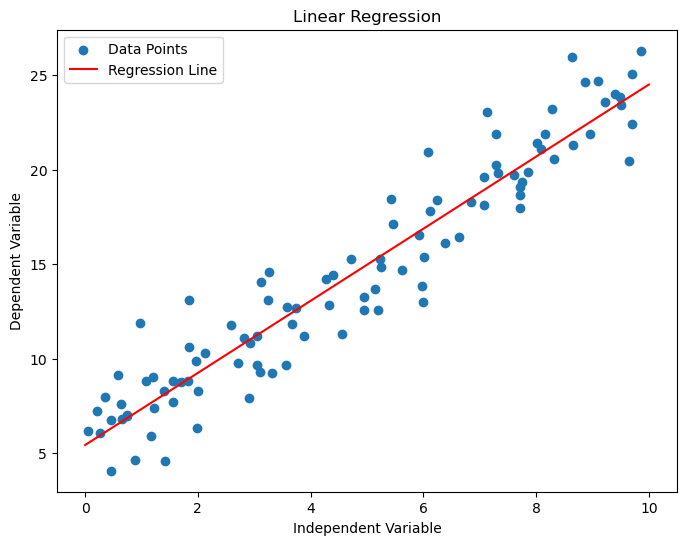

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate some synthetic data for demonstration
np.random.seed(42)
n_samples = 100
X = np.random.rand(n_samples) * 10  # Independent variable
true_slope = 2
true_intercept = 5
Y = true_slope * X + true_intercept + np.random.normal(0, 2, n_samples)  # Dependent variable with noise

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X)
results = model.fit()

# Print results
print(results.summary())

#Plot the data and regression line
x_values = np.linspace(0,10, 100)
x_values_const= sm.add_constant(x_values)
predicted_values= results.predict(x_values_const)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 1], Y, label="Data Points") #X is array with constant, plot the second column
plt.plot(x_values, predicted_values, label="Regression Line", color='red')
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.title("Linear Regression")
plt.legend()
plt.show()


## 7. Logistic Regression <a name="logistic-regression"></a>

**Explanation:**

Logistic regression is used for binary classification problems, where the dependent variable is categorical (e.g., click/no-click, convert/not-convert). In product analytics, it can be used to predict the likelihood of a user performing a specific action.

**Takeaway for Product Analytics:** Logistic regression can be used to predict user churn, conversion rates, and other binary outcomes, allowing for targeted interventions.


Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.82      0.73        28
           1       0.80      0.62      0.70        32

    accuracy                           0.72        60
   macro avg       0.73      0.72      0.72        60
weighted avg       0.73      0.72      0.72        60


Confusion Matrix:
[[23  5]
 [12 20]]


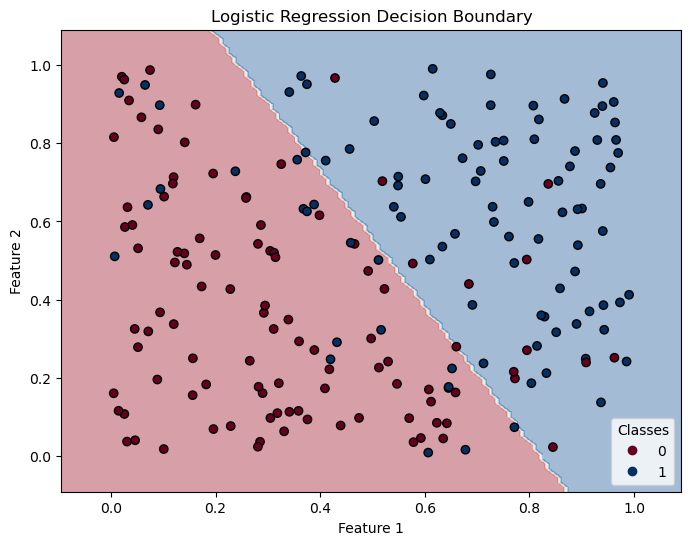

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create some synthetic data for demonstration
np.random.seed(42)

n_samples = 200

X = np.random.rand(n_samples, 2) # two features
# Create some non-linearity for a more interesting classification
y = (X[:, 0] + X[:, 1] + np.random.normal(0, 0.3, n_samples) > 1).astype(int)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Fit logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


# Plot decision boundary (for two features)
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


## 8. Experimental Design in Social Networks <a name="experimental-design-in-social-networks"></a>

**Explanation:**

Conducting experiments in social networks presents unique challenges due to network effects. Users are interconnected, which can lead to interference between treatment and control groups. Key considerations include:

*   **Network Effects:** The behavior of one user can influence the behavior of their connections.
*   **Spillover Effects:** The treatment applied to one user can "spill over" and affect users in the control group.
*   **Clustering:** Users tend to cluster with similar users, which can make it difficult to achieve proper randomization.

**Takeaway for Product Analytics:** It’s important to account for these challenges when designing experiments in social networks to ensure valid and reliable results. Techniques like cluster randomization or graph-based experiments can help mitigate these issues.


In [3]:
import numpy as np
import pandas as pd
import random

# Simulating a small social network
np.random.seed(42)
num_users = 50
connectivity_prob = 0.2 # Probability of connection between two users
user_ids = list(range(num_users))

# Create an adjacency matrix
adjacency_matrix = np.random.binomial(1, connectivity_prob, size=(num_users, num_users))
np.fill_diagonal(adjacency_matrix, 0) # Remove self-loops
network = pd.DataFrame(adjacency_matrix, columns=user_ids, index=user_ids)
print("Simulated Social Network (Adjacency Matrix):")
display(network)

# Assign users to treatment and control groups (with basic randomization)
treatment_size = int(num_users/2)
treatment_group = random.sample(user_ids, treatment_size)
control_group = [user for user in user_ids if user not in treatment_group]

print(f"\nTreatment Group (Basic Randomization): {treatment_group}")
print(f"Control Group (Basic Randomization): {control_group}")


# Simulate basic user behavior (simple metrics)
def simulate_metric(group, network, treatment=False):
    metrics = {}
    for user in group:
        base_metric = np.random.normal(loc=5, scale=2)
        if treatment:
            base_metric += np.random.normal(loc=2, scale=0.5) # Treatment Effect
            for neighbor in network.loc[user][network.loc[user]==1].index: #Network/Spillover effect
                if neighbor in group:
                    base_metric += np.random.normal(loc=0.5, scale =0.25)
        metrics[user] = base_metric
    return metrics

#Simulate with basic randomization
control_metrics = simulate_metric(control_group, network)
treatment_metrics = simulate_metric(treatment_group, network, treatment=True)


# Print average metrics
print("\nAverage Metrics (Basic Randomization)")
print(f"Average control metrics: {np.mean(list(control_metrics.values())):.2f}")
print(f"Average treatment metrics: {np.mean(list(treatment_metrics.values())):.2f}")

#Cluster randomization
num_clusters = 5
#Randomly assign users to clusters
user_cluster_assignments= {}
for user in user_ids:
    user_cluster_assignments[user] = random.randint(0,num_clusters -1)

#randomly assing the clusters to treatment or control
cluster_ids = list(range(num_clusters))
treatment_clusters = random.sample(cluster_ids, int(num_clusters/2))
control_clusters = [cluster for cluster in cluster_ids if cluster not in treatment_clusters]

#assign users to treatment and control
treatment_group = [user for user, cluster in user_cluster_assignments.items() if cluster in treatment_clusters]
control_group = [user for user, cluster in user_cluster_assignments.items() if cluster in control_clusters]

print(f"\nTreatment Group (Cluster Randomization): {treatment_group}")
print(f"Control Group (Cluster Randomization): {control_group}")

#Simulate with cluster randomization
control_metrics_cluster = simulate_metric(control_group, network)
treatment_metrics_cluster = simulate_metric(treatment_group, network, treatment=True)


# Print average metrics for cluster randomization
print("\nAverage Metrics (Cluster Randomization)")
print(f"Average control metrics: {np.mean(list(control_metrics_cluster.values())):.2f}")
print(f"Average treatment metrics: {np.mean(list(treatment_metrics_cluster.values())):.2f}")

Simulated Social Network (Adjacency Matrix):


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,0
4,0,0,0,1,0,0,0,0,0,0,...,1,1,1,0,0,1,0,1,1,1
5,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0
8,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,1,1,1,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1



Treatment Group (Basic Randomization): [5, 0, 14, 48, 31, 3, 20, 1, 22, 41, 38, 40, 10, 9, 26, 42, 23, 28, 37, 47, 33, 45, 6, 29, 39]
Control Group (Basic Randomization): [2, 4, 7, 8, 11, 12, 13, 15, 16, 17, 18, 19, 21, 24, 25, 27, 30, 32, 34, 35, 36, 43, 44, 46, 49]

Average Metrics (Basic Randomization)
Average control metrics: 5.18
Average treatment metrics: 9.67

Treatment Group (Cluster Randomization): [0, 4, 14, 15, 16, 17, 21, 22, 23, 30, 32, 33, 34, 35, 36, 43, 45, 47]
Control Group (Cluster Randomization): [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 18, 19, 20, 24, 25, 26, 27, 28, 29, 31, 37, 38, 39, 40, 41, 42, 44, 46, 48, 49]

Average Metrics (Cluster Randomization)
Average control metrics: 4.85
Average treatment metrics: 9.06


## 9. Bias-Variance Tradeoff <a name="bias-variance-tradeoff"></a>

**Explanation:**

The bias-variance tradeoff is a fundamental concept in machine learning. It describes the relationship between a model's ability to fit the training data (low bias) and its ability to generalize to new data (low variance).

*   **Bias:** Error from simplifying assumptions in the model. High bias leads to underfitting.
*   **Variance:** Error from sensitivity to small fluctuations in the training data. High variance leads to overfitting.

**Takeaway for Product Analytics:** Finding the right balance between bias and variance is crucial for building models that accurately predict user behavior and generalize well to new data.



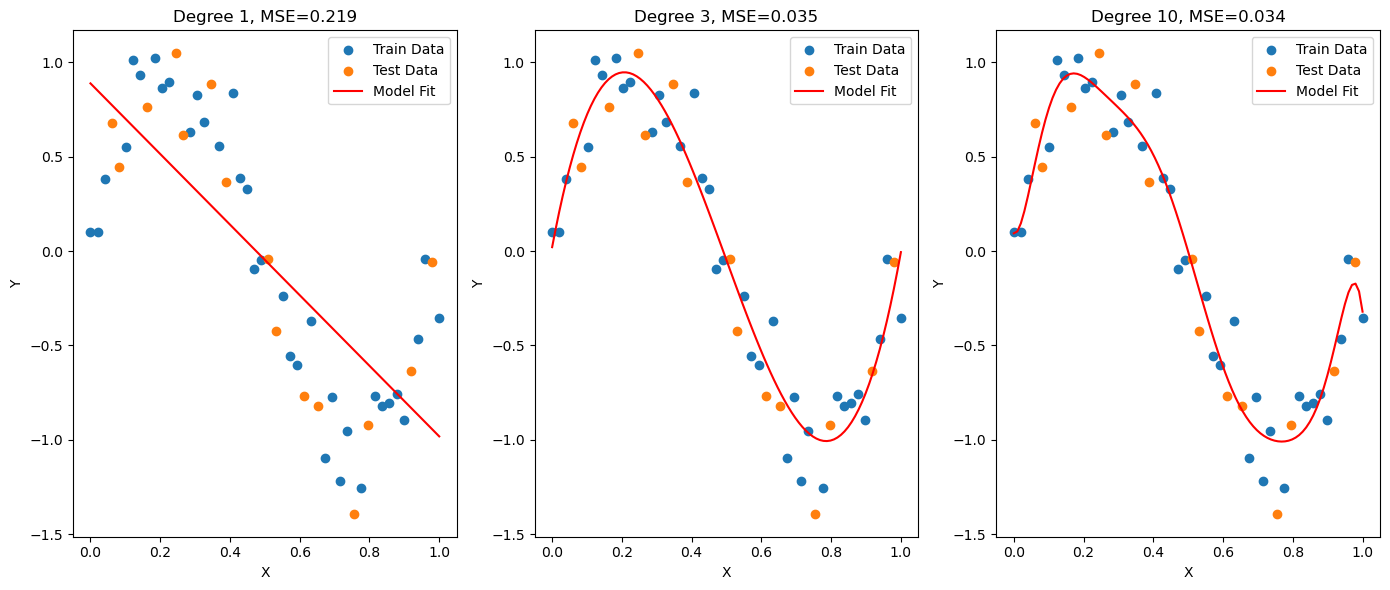

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate some synthetic data
np.random.seed(42)
X = np.linspace(0, 1, 50)
Y = np.sin(2 * np.pi * X) + np.random.normal(0, 0.2, 50)
X= X.reshape(-1, 1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


degrees = [1, 3, 10]
plt.figure(figsize=(14, 6))

for i, degree in enumerate(degrees):
    # Polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)

    # Plot the fitted function
    X_plot = np.linspace(0, 1, 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    plt.subplot(1, 3, i + 1)
    plt.scatter(X_train, y_train, label="Train Data")
    plt.scatter(X_test, y_test, label="Test Data")
    plt.plot(X_plot, y_plot, color='red', label="Model Fit")
    plt.title(f"Degree {degree}, MSE={mse:.3f}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()

plt.tight_layout()
plt.show()


## 10. Resampling Techniques <a name="resampling-techniques"></a>

**Explanation:**

Resampling techniques are used to estimate the sampling distribution of a statistic or to evaluate the performance of a model. Common techniques include:

*   **Bootstrapping:** Randomly sampling with replacement from the original data to create multiple datasets and estimate the variability of a statistic (e.g., confidence intervals). Useful when the underlying distribution is unknown or complex.
*   **Cross-Validation:** Partitioning the data into subsets and training/evaluating the model on different combinations of these subsets. Used to assess model performance and prevent overfitting. K-fold cross-validation is a common technique.

**Takeaway for Product Analytics:** Resampling techniques provide robust methods for evaluating model performance and estimating uncertainty, especially when dealing with limited data or complex models. They can help in making more reliable product decisions.


--- Bootstrapping ---
Estimated Mean: 4.795
95% Confidence Interval: 4.450, 5.141


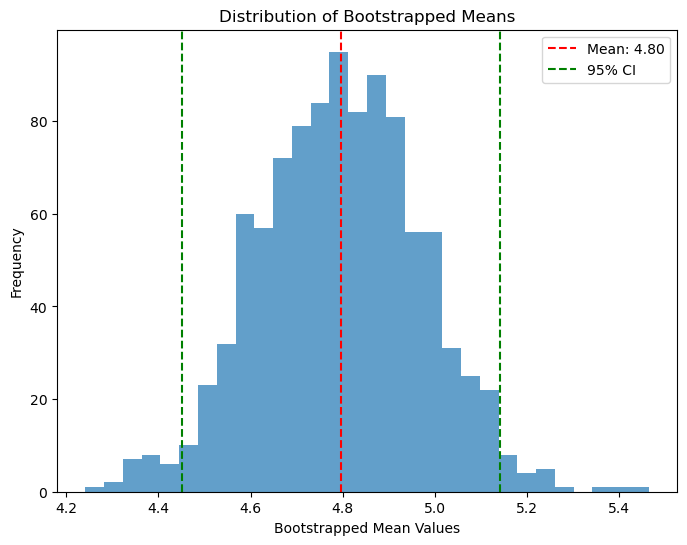


--- K-Fold Cross-Validation ---
Mean MSE across 5 folds: 0.239


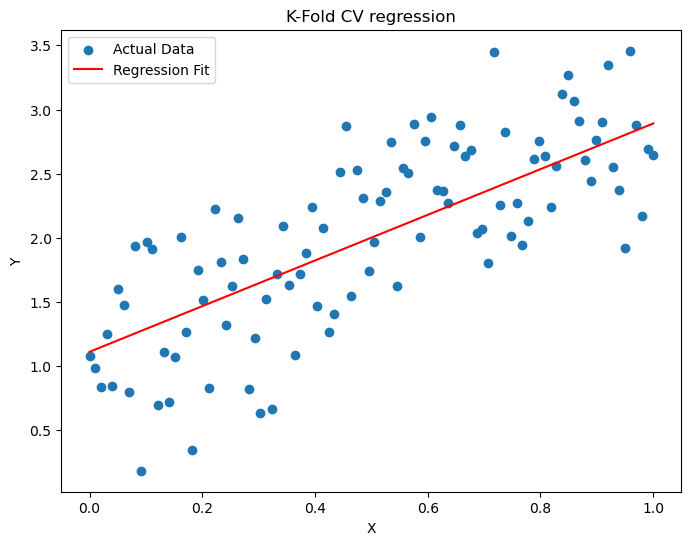

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# --- Bootstrapping ---
print("--- Bootstrapping ---")

# Generate sample data
np.random.seed(42)
data = np.random.normal(loc=5, scale=2, size=100)

# Number of bootstrap samples
n_bootstraps = 1000

# Bootstrap sampling and calculate the mean
bootstrap_means = []
for _ in range(n_bootstraps):
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Estimate the mean and confidence interval
mean_estimate = np.mean(bootstrap_means)
std_estimate = np.std(bootstrap_means)
confidence_interval = (mean_estimate - 1.96 * std_estimate, mean_estimate + 1.96 * std_estimate)

print(f"Estimated Mean: {mean_estimate:.3f}")
print(f"95% Confidence Interval: {confidence_interval[0]:.3f}, {confidence_interval[1]:.3f}")

# Plot histogram of bootstrap means
plt.figure(figsize=(8,6))
plt.hist(bootstrap_means, bins=30, alpha=0.7)
plt.axvline(mean_estimate, color="red", linestyle="dashed", label=f"Mean: {mean_estimate:.2f}")
plt.axvline(confidence_interval[0], color="green", linestyle="dashed", label=f"95% CI")
plt.axvline(confidence_interval[1], color="green", linestyle="dashed")
plt.xlabel("Bootstrapped Mean Values")
plt.ylabel("Frequency")
plt.title("Distribution of Bootstrapped Means")
plt.legend()
plt.show()


# --- K-Fold Cross-Validation ---
print("\n--- K-Fold Cross-Validation ---")

# Generate sample data for linear regression
X = np.linspace(0, 1, 100).reshape(-1, 1)
Y = 2 * X.squeeze() + 1 + np.random.normal(0, 0.5, 100)

# Number of folds
k = 5

# Initialize KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store scores for each fold
mse_scores = []

# Iterate over the folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate the MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Print average MSE
print(f"Mean MSE across {k} folds: {np.mean(mse_scores):.3f}")

#Plot predicted vs actual
plt.figure(figsize=(8,6))
plt.scatter(X, Y, label="Actual Data")
X_plot = np.linspace(0,1,100).reshape(-1,1)
y_plot = model.predict(X_plot)
plt.plot(X_plot, y_plot, color='red', label="Regression Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("K-Fold CV regression")
plt.legend()
plt.show()

## 11. Measures of Central Tendency <a name="measures-of-central-tendency"></a>

**Explanation:**

Measures of central tendency describe the "typical" or "average" value in a dataset. Understanding these measures is fundamental for summarizing user behavior and identifying trends.

*   **Mean:** The average of all values. Sensitive to outliers.
*   **Median:** The middle value when the data is sorted. Robust to outliers.
*   **Mode:** The most frequent value. Useful for categorical data or identifying peaks in distributions.

**Takeaway for Product Analytics:** Choosing the appropriate measure of central tendency depends on the data's distribution and the presence of outliers. For example, the median is often preferred over the mean when analyzing user spending data, which is often skewed.



In [ ]:
import numpy as np
from scipy import stats

# Sample data
data = np.array([10, 12, 15, 18, 20, 20, 25, 100])

# Calculate the mean
mean_value = np.mean(data)
print(f"Mean: {mean_value:.2f}")

# Calculate the median
median_value = np.median(data)
print(f"Median: {median_value:.2f}")

# Calculate the mode
mode_value = stats.mode(data, keepdims=True)[0][0]
print(f"Mode: {mode_value}")


## 12. Measures of Dispersion <a name="measures-of-dispersion"></a>

**Explanation:**

Measures of dispersion describe the spread or variability of the data. They are crucial for understanding the consistency of user behavior and identifying outliers.

*   **Range:** The difference between the maximum and minimum values. Sensitive to outliers.
*   **Variance:** The average squared deviation from the mean.
*   **Standard Deviation:** The square root of the variance. Easier to interpret than variance as it's in the same units as the data.
*   **Interquartile Range (IQR):** The difference between the 75th and 25th percentiles. Robust to outliers.

**Takeaway for Product Analytics:** Understanding the dispersion of key metrics like session duration or purchase amounts can help identify user segments with different behavior patterns.


In [6]:
import numpy as np
from scipy import stats

# Sample data
data = np.array([10, 12, 15, 18, 20, 20, 25, 100])

# Calculate the range
range_value = np.max(data) - np.min(data)
print(f"Range: {range_value}")

# Calculate the variance
variance_value = np.var(data)
print(f"Variance: {variance_value:.2f}")

# Calculate the standard deviation
std_dev_value = np.std(data)
print(f"Standard Deviation: {std_dev_value:.2f}")

# Calculate the IQR
iqr_value = stats.iqr(data)
print(f"IQR: {iqr_value:.2f}")

Range: 90
Variance: 771.00
Standard Deviation: 27.77
IQR: 7.00


## 13. Percentiles and Quantiles <a name="percentiles-and-quantiles"></a>

**Explanation:**

Percentiles and quantiles divide the data into equal parts. They are useful for understanding the distribution of data and identifying specific thresholds.

*   **Percentiles:** Divide the data into 100 equal parts. For example, the 90th percentile is the value below which 90% of the data falls.
*   **Quartiles:** Divide the data into four equal parts (25th, 50th, and 75th percentiles).

**Takeaway for Product Analytics:** Percentiles and quantiles can be used for user segmentation (e.g., top 10% of users based on engagement), setting thresholds for alerts (e.g., identifying users with unusually high activity), and understanding the distribution of key metrics.


In [7]:
import numpy as np

# Sample data
data = np.array([10, 12, 15, 18, 20, 20, 25, 100])

# Calculate percentiles
percentiles = [25, 50, 75, 90]
percentile_values = np.percentile(data, percentiles)
for p, v in zip(percentiles, percentile_values):
  print(f"{p}th Percentile: {v:.2f}")

# Calculate quantiles (using percentiles/100)
quantile_values = np.quantile(data, [0.25, 0.5, 0.75])
print(f"\nQuartiles: Q1={quantile_values[0]:.2f}, Q2={quantile_values[1]:.2f}, Q3={quantile_values[2]:.2f}")

25th Percentile: 14.25
50th Percentile: 19.00
75th Percentile: 21.25
90th Percentile: 47.50

Quartiles: Q1=14.25, Q2=19.00, Q3=21.25



## 14. Data Transformation <a name="data-transformation"></a>

**Explanation:**

Data transformation techniques are used to change the distribution or scale of data. This can be useful for improving model performance or making data easier to interpret.

*   **Standardization (Z-score):** Transforms data to have a mean of 0 and a standard deviation of 1. Useful for comparing variables with different scales.
*   **Normalization (Min-Max scaling):** Scales data to a specific range (e.g., 0 to 1). Useful when the data has a bounded range.
*   **Log Transformation:** Compresses the scale of data, often used to reduce skewness and make data more normally distributed.

**Takeaway for Product Analytics:** Data transformations can improve the performance of machine learning models and make data easier to visualize and interpret. For example, log transformation is often used to handle skewed metrics like user spending.


Standardized Data: [-1.01204863 -0.85634884 -0.70064905 -0.54494926 -0.38924947  0.38924947
  1.16774842  1.94624736]
Normalized Data: [0.         0.05263158 0.10526316 0.15789474 0.21052632 0.47368421
 0.73684211 1.        ]


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


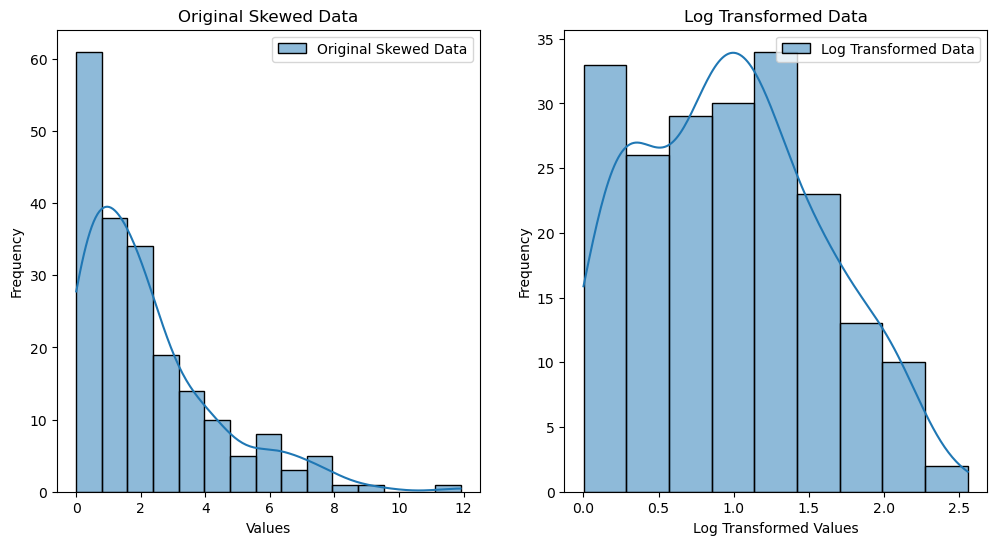

In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = np.array([1, 2, 3, 4, 5, 10, 15, 20])
data_skew = np.random.exponential(scale=2, size=200) #Example of skewed data

# --- Standardization (Z-score) ---
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data.reshape(-1, 1)).flatten()

print("Standardized Data:", standardized_data)

# --- Normalization (Min-Max Scaling) ---
min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(data.reshape(-1, 1)).flatten()
print("Normalized Data:", normalized_data)

# --- Log Transformation ---
log_transformed_data = np.log1p(data_skew)

#Plot distributions before/after
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(data_skew, kde=True, label = 'Original Skewed Data')
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Original Skewed Data")
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(log_transformed_data, kde=True, label="Log Transformed Data")
plt.xlabel("Log Transformed Values")
plt.ylabel("Frequency")
plt.title("Log Transformed Data")
plt.legend()
plt.show()


## 15. Probability Basics <a name="probability-basics"></a>

**Explanation:**

Understanding basic probability concepts is essential for data analysis and decision-making.

*   **Conditional Probability:** The probability of an event occurring given that another event has already occurred.
*   **Bayes' Theorem:** Relates conditional probabilities. Useful for updating beliefs based on new evidence.

**Takeaway for Product Analytics:** Conditional probability can be used to understand the likelihood of a user performing an action given their past behavior. Bayes' theorem can be used to update estimates of conversion rates or other metrics based on A/B test results.

In [9]:
# Conditional Probability Example

# Define events: A is clicking an ad, B is making a purchase
#P(B|A) - Probability of making a purchase given user clicked the ad
P_A = 0.1  # Probability of clicking an ad
P_B = 0.05  # Probability of making a purchase
P_A_and_B = 0.02 # Probability of both

P_B_given_A = P_A_and_B/P_A

print(f"P(A): {P_A}")
print(f"P(B): {P_B}")
print(f"P(A and B): {P_A_and_B}")
print(f"P(B|A) - Probability of making a purchase given click {P_B_given_A:.2f}")

# Bayes Theorem
# P(A|B) = (P(B|A) * P(A)) / P(B)

P_A_given_B = (P_B_given_A * P_A)/P_B

print(f"P(A|B) Probability of a user clicking an ad given they purchase: {P_A_given_B:.2f}")

P(A): 0.1
P(B): 0.05
P(A and B): 0.02
P(B|A) - Probability of making a purchase given click 0.20
P(A|B) Probability of a user clicking an ad given they purchase: 0.40


## 16. Discrete Distributions <a name="discrete-distributions"></a>

**Explanation:**

Discrete distributions describe the probability of discrete outcomes (e.g., counts).

*   **Bernoulli Distribution:** Models a single binary outcome (e.g., click/no-click).
*   **Binomial Distribution:** Models the number of successes in a fixed number of independent Bernoulli trials.
*   **Poisson Distribution:** Models the number of events occurring in a fixed interval of time or space.

**Takeaway for Product Analytics:** Discrete distributions can be used to model user behavior such as conversion rates (Binomial), number of support tickets (Poisson), etc.


Bernoulli Distribution Simulation:
Mean of data: 0.32, Expected: 0.3

Binomial Distribution Simulation:
Mean of data: 4.01, Expected Mean: 4.0

Poisson Distribution Simulation:
Mean of data: 4.86, Expected Mean: 5


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


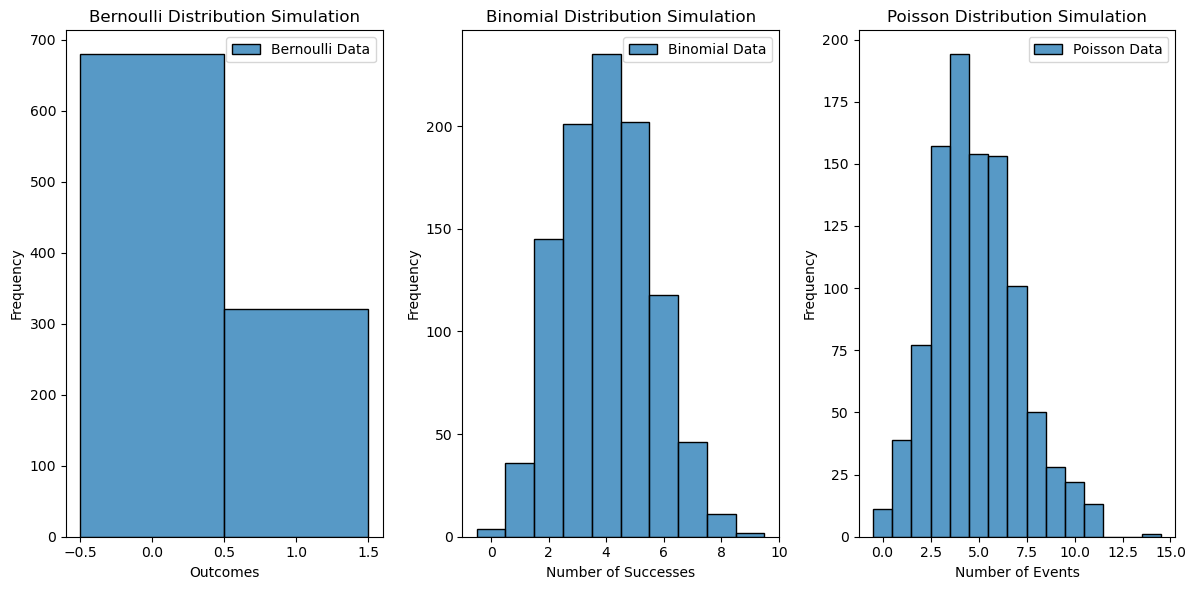

In [10]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# --- Bernoulli Distribution ---
p = 0.3 # probability of success
bern_data = np.random.binomial(1, p, size = 1000)
print("Bernoulli Distribution Simulation:")
print(f"Mean of data: {np.mean(bern_data):.2f}, Expected: {p}")

# --- Binomial Distribution ---
n = 10 # number of trials
p = 0.4 # probability of success
binomial_data = np.random.binomial(n, p, size=1000)
print("\nBinomial Distribution Simulation:")
print(f"Mean of data: {np.mean(binomial_data):.2f}, Expected Mean: {n*p}")

# --- Poisson Distribution ---
lam = 5 # average rate (lambda)
poisson_data = np.random.poisson(lam, size = 1000)

print("\nPoisson Distribution Simulation:")
print(f"Mean of data: {np.mean(poisson_data):.2f}, Expected Mean: {lam}")

# Plot Histograms
plt.figure(figsize=(12,6))

plt.subplot(1, 3, 1)
sns.histplot(bern_data, discrete=True, label="Bernoulli Data")
plt.title("Bernoulli Distribution Simulation")
plt.xlabel("Outcomes")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 3, 2)
sns.histplot(binomial_data, discrete=True, label="Binomial Data")
plt.title("Binomial Distribution Simulation")
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1,3,3)
sns.histplot(poisson_data, discrete=True, label="Poisson Data")
plt.title("Poisson Distribution Simulation")
plt.xlabel("Number of Events")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

## 17. Continuous Distributions <a name="continuous-distributions"></a>

**Explanation:**

Continuous distributions describe the probability of continuous outcomes (e.g., time, weight, height).

*   **Normal Distribution:** Often used to model real-valued random variables whose distributions are not known. Many natural phenomena approximately follow a normal distribution.
*   **Exponential Distribution:** Often used to model the time between events in a Poisson process.
*   **Uniform Distribution:** All outcomes within a given range are equally likely.

**Takeaway for Product Analytics:** Continuous distributions can be used to model metrics like session duration, purchase amounts, and other continuous user behavior data.


Normal Distribution Simulated Data Mean: 0.03, Std. Dev: 1.03

Exponential Distribution Simulated Data Mean: 2.01, Expected: 2

Uniform Distribution Simulated Data Mean: 5.46, Expected Midpoint: 5.5


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


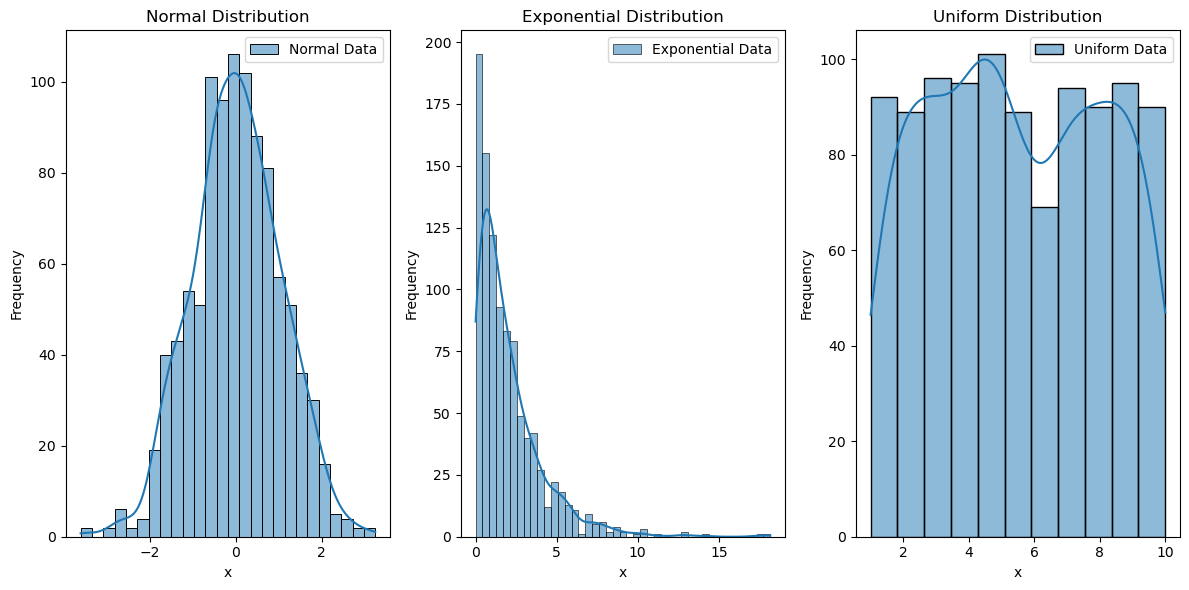

In [11]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


# --- Normal Distribution ---
mu = 0 # Mean
sigma = 1 # Standard Deviation
normal_data = np.random.normal(mu, sigma, size=1000)
print(f"Normal Distribution Simulated Data Mean: {np.mean(normal_data):.2f}, Std. Dev: {np.std(normal_data):.2f}")


# --- Exponential Distribution ---
scale = 2 # Scale
exponential_data = np.random.exponential(scale, size = 1000)
print(f"\nExponential Distribution Simulated Data Mean: {np.mean(exponential_data):.2f}, Expected: {scale}")

# --- Uniform Distribution ---
low = 1 # Lower bound
high = 10 # Upper Bound
uniform_data = np.random.uniform(low, high, size=1000)
print(f"\nUniform Distribution Simulated Data Mean: {np.mean(uniform_data):.2f}, Expected Midpoint: {(low+high)/2}")

#Plot distributions
plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
sns.histplot(normal_data, kde=True, label = "Normal Data")
plt.xlabel("x")
plt.ylabel("Frequency")
plt.title("Normal Distribution")
plt.legend()

plt.subplot(1, 3, 2)
sns.histplot(exponential_data, kde=True, label ="Exponential Data")
plt.xlabel("x")
plt.ylabel("Frequency")
plt.title("Exponential Distribution")
plt.legend()

plt.subplot(1, 3, 3)
sns.histplot(uniform_data, kde=True, label = "Uniform Data")
plt.xlabel("x")
plt.ylabel("Frequency")
plt.title("Uniform Distribution")
plt.legend()
plt.tight_layout()
plt.show()


## 18. Central Limit Theorem <a name="central-limit-theorem"></a>

**Explanation:**

The Central Limit Theorem (CLT) states that the distribution of sample means will approach a normal distribution as the sample size increases, regardless of the shape of the original population distribution.

**Takeaway for Product Analytics:** The CLT is fundamental for statistical inference. It allows us to use normal distribution-based tests (like t-tests and z-tests) even when the underlying population distribution is not normal, provided we have a sufficiently large sample size.


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

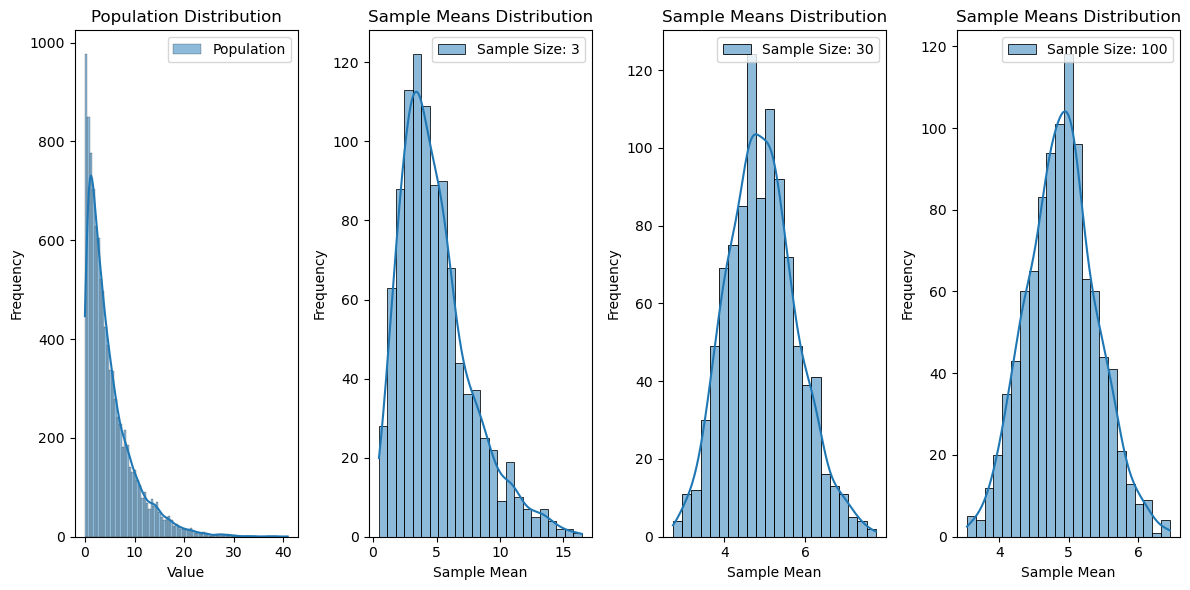

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Population distribution (example using exponential)
np.random.seed(42)
population_data = np.random.exponential(scale=5, size=10000)


# Number of samples and sample sizes
n_samples = 1000
sample_sizes = [3, 30, 100]

# Generate sample means
sample_means = []
for sample_size in sample_sizes:
    sample_means_for_size = []
    for _ in range(n_samples):
        sample = np.random.choice(population_data, size=sample_size)
        sample_means_for_size.append(np.mean(sample))
    sample_means.append(sample_means_for_size)


#Plot histograms to see distribution
plt.figure(figsize=(12,6))
plt.subplot(1, len(sample_sizes)+1 , 1)
sns.histplot(population_data, kde=True, label="Population")
plt.title("Population Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()

for i, sample_means_for_size in enumerate(sample_means):
    plt.subplot(1, len(sample_sizes)+1, i+2)
    sns.histplot(sample_means_for_size, kde=True, label=f"Sample Size: {sample_sizes[i]}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Frequency")
    plt.title(f"Sample Means Distribution")
    plt.legend()
plt.tight_layout()
plt.show()

## 19. Hypothesis Testing Framework <a name="hypothesis-testing-framework"></a>

**Explanation:**

The hypothesis testing framework provides a structured approach to making decisions based on data.

*   **Null and Alternative Hypotheses:** Defining the hypotheses being tested.
*   **Test Statistic:** A statistic calculated from the sample data to evaluate the hypotheses.
*   **P-value:** The probability of observing the data (or more extreme data) if the null hypothesis is true.
*   **Significance Level (alpha):** A threshold for rejecting the null hypothesis (typically 0.05).
*   **Type I and Type II Errors:** Understanding the risks of making incorrect conclusions.

**Takeaway for Product Analytics:** The hypothesis testing framework provides a rigorous way to evaluate the impact of product changes and avoid making decisions based on random fluctuations in data.


Sample size needed for specified alpha, power, effect size: 64

Example hypothesis test with the given sample, Null Hypothesis μ=10
T Statistic: 0.523
P Value: 0.603
Fail to reject null hypothesis. There is not a significant difference


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


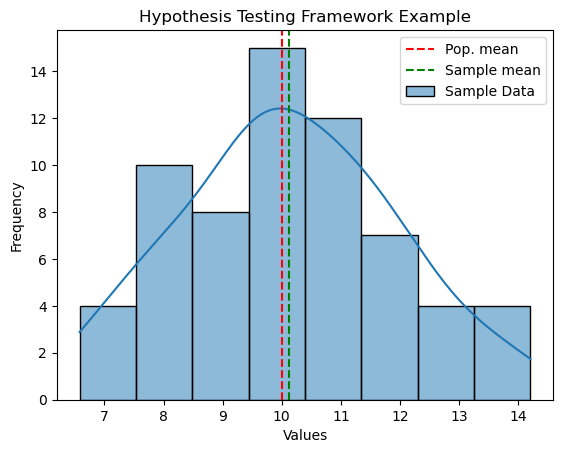

In [14]:
import math
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.power import TTestIndPower

# --- Example of Hypothesis Testing Framework ---

#Simulate a simple scenario: testing whether the mean of a sample is different from a population mean
# Set Parameters:
np.random.seed(42)
pop_mean = 10
sample_size = 50
effect_size = 0.5 # the difference we would like to detect
alpha = 0.05 #significance level, type 1 error
power = 0.8 # probability of avoiding type 2 error

# Calculate sample size with statsmodels power analysis tool
analysis = TTestIndPower() # indendent samples t test
sample_size = analysis.solve_power(effect_size = effect_size, power=power, alpha=alpha)
sample_size = math.ceil(sample_size) # round up
print(f"Sample size needed for specified alpha, power, effect size: {sample_size}")


# Generate sample with an effect, to show an example where we reject the null hypothesis
sample_mean_true = pop_mean + effect_size
sample = np.random.normal(loc = sample_mean_true, scale = 2, size = sample_size)

print(f"\nExample hypothesis test with the given sample, Null Hypothesis μ={pop_mean}")
#Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(sample, pop_mean)
print(f"T Statistic: {t_stat:.3f}")
print(f"P Value: {p_value:.3f}")

# Make a decision based on p-value
if p_value < alpha:
    print("Reject null hypothesis. The mean is significantly different from the population mean")
else:
    print("Fail to reject null hypothesis. There is not a significant difference")

# Example histogram to visualize
sns.histplot(sample, kde=True, label="Sample Data")
plt.axvline(pop_mean, color='r', linestyle='dashed', label="Pop. mean")
plt.axvline(np.mean(sample), color='g', linestyle="dashed", label="Sample mean")
plt.title("Hypothesis Testing Framework Example")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend()
plt.show()


## 20. One-Sample Tests <a name="one-sample-tests"></a>

**Explanation:**

One-sample tests are used to compare a sample mean to a known or hypothesized population mean.

*   **t-test:** Used when the population standard deviation is unknown.
*   **z-test:** Used when the population standard deviation is known or the sample size is very large.

**Takeaway for Product Analytics:** These tests can be used to determine if a metric has changed significantly over time or if a sample of users differs significantly from the general population.

In [15]:
from scipy import stats
import numpy as np

# --- Example of One-Sample t-test ---
# Simulating user activity from product A
np.random.seed(42)
population_mean = 10 # assume that we have this value based on historical data
sample_size = 30
sample_product_a = np.random.normal(loc=11, scale=3, size = sample_size) #Simulate data from product A

print("One Sample t-test:")

#Perform the t-test
t_stat, p_value = stats.ttest_1samp(sample_product_a, population_mean)
print(f"T statistic: {t_stat:.3f}")
print(f"P value: {p_value:.3f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The mean from Product A is different from the population mean.")
else:
    print("Fail to reject the null hypothesis. The mean from Product A is not significantly different from the population mean.")


# --- Example of One-Sample z-test ---
#Example with the same mean data but assume we know pop std dev
print("\nOne Sample z-test (assume we know population standard deviation):")
population_std = 3
z_stat = (np.mean(sample_product_a) - population_mean)/(population_std/np.sqrt(sample_size)) # calculate z-stat
p_value_z = 2*(1 - stats.norm.cdf(np.abs(z_stat))) # calculate two-sided p-value from z score

print(f"Z statistic: {z_stat:.3f}")
print(f"P value: {p_value_z:.3f}")

if p_value_z < alpha:
    print("Reject the null hypothesis. The mean from Product A is different from the population mean.")
else:
    print("Fail to reject the null hypothesis. The mean from Product A is not significantly different from the population mean.")

One Sample t-test:
T statistic: 0.884
P value: 0.384
Fail to reject the null hypothesis. The mean from Product A is not significantly different from the population mean.

One Sample z-test (assume we know population standard deviation):
Z statistic: 0.795
P value: 0.426
Fail to reject the null hypothesis. The mean from Product A is not significantly different from the population mean.



## 21. Two-Sample Tests <a name="two-sample-tests"></a>

**Explanation:**

Two-sample tests are used to compare the means of two independent samples or to analyze relationships between categorical variables.

*   **Independent t-test:** Used to compare the means of two independent groups (e.g., control vs. treatment in an A/B test). Assumes equal variances (or uses a Welch's t-test if variances are unequal).
*   **Paired t-test:** Used to compare the means of two related groups (e.g., before and after measurements on the same users).
*   **Chi-square test:** Used to test for independence between two categorical variables (e.g., ad format and conversion rate).

**Takeaway for Product Analytics:** These tests are crucial for A/B testing, comparing different user segments, and analyzing relationships between categorical product features and user behavior.


In [16]:
from scipy import stats
import numpy as np
import pandas as pd
# --- Example of Independent t-test ---
np.random.seed(42)
group_a = np.random.normal(loc=10, scale=2, size=100)
group_b = np.random.normal(loc=10.5, scale=2, size=100)
print("Independent samples t-test:")

#Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(group_a, group_b)
print(f"T statistic: {t_stat:.3f}")
print(f"P Value: {p_value:.3f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference between group A and group B.")
else:
    print("Fail to reject the null hypothesis. There is not a statistically significant difference between group A and group B.")



# --- Example of Paired t-test ---
print("\nPaired samples t-test:")
# Generate paired samples (before and after)
before = np.random.normal(loc=10, scale=3, size=100)
after = before + np.random.normal(loc=0.3, scale=1, size=100) # adding an effect

t_stat_paired, p_value_paired = stats.ttest_rel(before, after)
print(f"T statistic: {t_stat_paired:.3f}")
print(f"P Value: {p_value_paired:.3f}")

if p_value_paired < alpha:
    print("Reject null. The mean of before and after are different.")
else:
    print("Fail to reject null. There is not a significant difference between before and after mean.")

# --- Example of Chi-square test ---
print("\nChi-square test:")
observed_counts = np.array([[30, 70], [40, 60]]) #Example of categorical conversion data
#Example of categorical conversion data
#                     Converted    Did not convert
#  Variant A         30              70
#  Variant B         40              60


#Perform the test
chi2_stat, p_value_chi, _, _ = stats.chi2_contingency(observed_counts)

print(f"Chi2 statistic: {chi2_stat:.3f}")
print(f"P value: {p_value_chi:.3f}")

if p_value_chi < alpha:
    print("Reject the null. There is an association between the groups and the event.")
else:
    print("Fail to reject. There isn't an association between the groups and the event.")

Independent samples t-test:
T statistic: -2.856
P Value: 0.005
Reject the null hypothesis. There is a statistically significant difference between group A and group B.

Paired samples t-test:
T statistic: -4.602
P Value: 0.000
Reject null. The mean of before and after are different.

Chi-square test:
Chi2 statistic: 1.780
P value: 0.182
Fail to reject. There isn't an association between the groups and the event.


## 22. A/B Testing in Social Networks <a name="ab-testing-in-social-networks"></a>

**Explanation:**

A/B testing in social networks requires careful consideration of network effects, where a user's behavior can influence their connections.

*   **Network Effects:** The treatment applied to one user can "spill over" and affect users in the control group (interference).
*   **Spillover Effects:** Measuring and mitigating spillover effects is crucial for accurate A/B test results.
*   **Clustering:** Users tend to cluster with similar users, which can bias randomization.
*   **Solutions:** Cluster randomization (randomizing at the group level), graph-based experiments, and careful metric selection are important considerations.

**Takeaway for Product Analytics:** Ignoring network effects can lead to inaccurate conclusions in A/B tests. Specialized techniques are necessary to obtain reliable results in social network settings.


In [ ]:
import numpy as np
import pandas as pd
import random

# Simulating a small social network
np.random.seed(42)
num_users = 50
connectivity_prob = 0.2 # Probability of connection between two users
user_ids = list(range(num_users))

# Create an adjacency matrix
adjacency_matrix = np.random.binomial(1, connectivity_prob, size=(num_users, num_users))
np.fill_diagonal(adjacency_matrix, 0) # Remove self-loops
network = pd.DataFrame(adjacency_matrix, columns=user_ids, index=user_ids)
print("Simulated Social Network (Adjacency Matrix):")
display(network)

# Assign users to treatment and control groups (with basic randomization)
treatment_size = int(num_users/2)
treatment_group = random.sample(user_ids, treatment_size)
control_group = [user for user in user_ids if user not in treatment_group]

print(f"\nTreatment Group (Basic Randomization): {treatment_group}")
print(f"Control Group (Basic Randomization): {control_group}")


# Simulate basic user behavior (simple metrics)
def simulate_metric(group, network, treatment=False):
    metrics = {}
    for user in group:
        base_metric = np.random.normal(loc=5, scale=2)
        if treatment:
            base_metric += np.random.normal(loc=2, scale=0.5) # Treatment Effect
            for neighbor in network.loc[user][network.loc[user]==1].index: #Network/Spillover effect
                if neighbor in group:
                    base_metric += np.random.normal(loc=0.5, scale =0.25)
        metrics[user] = base_metric
    return metrics

#Simulate with basic randomization
control_metrics = simulate_metric(control_group, network)
treatment_metrics = simulate_metric(treatment_group, network, treatment=True)


# Print average metrics
print("\nAverage Metrics (Basic Randomization)")
print(f"Average control metrics: {np.mean(list(control_metrics.values())):.2f}")
print(f"Average treatment metrics: {np.mean(list(treatment_metrics.values())):.2f}")

#Cluster randomization
num_clusters = 5
#Randomly assign users to clusters
user_cluster_assignments= {}
for user in user_ids:
    user_cluster_assignments[user] = random.randint(0,num_clusters -1)

#randomly assing the clusters to treatment or control
cluster_ids = list(range(num_clusters))
treatment_clusters = random.sample(cluster_ids, int(num_clusters/2))
control_clusters = [cluster for cluster in cluster_ids if cluster not in treatment_clusters]

#assign users to treatment and control
treatment_group = [user for user, cluster in user_cluster_assignments.items() if cluster in treatment_clusters]
control_group = [user for user, cluster in user_cluster_assignments.items() if cluster in control_clusters]

print(f"\nTreatment Group (Cluster Randomization): {treatment_group}")
print(f"Control Group (Cluster Randomization): {control_group}")

#Simulate with cluster randomization
control_metrics_cluster = simulate_metric(control_group, network)
treatment_metrics_cluster = simulate_metric(treatment_group, network, treatment=True)


# Print average metrics for cluster randomization
print("\nAverage Metrics (Cluster Randomization)")
print(f"Average control metrics: {np.mean(list(control_metrics_cluster.values())):.2f}")
print(f"Average treatment metrics: {np.mean(list(treatment_metrics_cluster.values())):.2f}")

## 23. Observational Studies vs. Experiments <a name="observational-studies-vs-experiments"></a>

**Explanation:**

*   **Observational Studies:** Data is collected without any intervention. Correlation can be observed, but causation cannot be inferred.
*   **Experiments:** Involve manipulating a variable (treatment) and observing its effect on an outcome. Allow for causal inference through randomization and control.

**Takeaway for Product Analytics:** While observational studies can identify interesting trends, experiments (like A/B tests) are necessary to establish causal relationships between product changes and user behavior.


Example Observational Study:
Correlation: 0.594


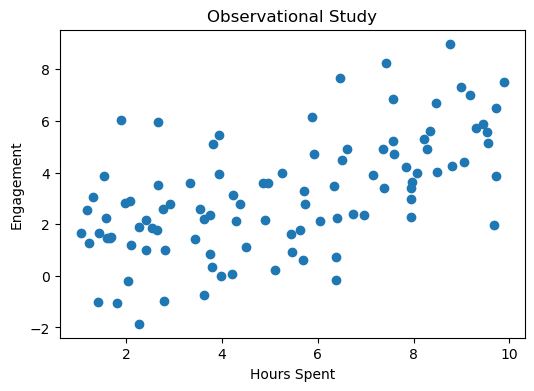


Interpretation of Observational Study:
An observational study shows correlation between two variables but doesn't establish causation.
In this example we see a positive relationship between hours spent and engagement, however other factors could be affecting engagement

Example Experiment (A/B Test):
T statistic: -4.240
P Value: 0.000


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


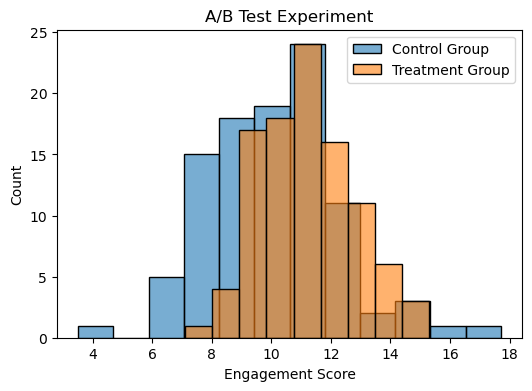


Interpretation of Experiment:
An experiment (A/B test) where users were randomly assigned can show a casual relationship between a change and its effect.
With statistical tests we can determine the significant differences in groups, where we would reject the null hypothesis.


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# --- Example of Observational Study (Correlation) ---
print("Example Observational Study:")
# Generate some observational data
np.random.seed(42)
num_users = 100
hours_spent = np.random.uniform(1, 10, num_users)
engagement = 0.6 * hours_spent + np.random.normal(0, 2, num_users)  #Engagement is correlated with hours, but not a direct effect
df_obs = pd.DataFrame({'Hours_Spent': hours_spent, 'Engagement': engagement})

# Calculate the correlation
corr_obs = df_obs['Hours_Spent'].corr(df_obs['Engagement'])
print(f"Correlation: {corr_obs:.3f}")

# Visualize
plt.figure(figsize=(6, 4))
plt.scatter(df_obs['Hours_Spent'], df_obs['Engagement'])
plt.xlabel("Hours Spent")
plt.ylabel("Engagement")
plt.title("Observational Study")
plt.show()

print("\nInterpretation of Observational Study:")
print("An observational study shows correlation between two variables but doesn't establish causation.")
print("In this example we see a positive relationship between hours spent and engagement, however other factors could be affecting engagement")
# --- Example of Experiment (A/B Test) ---
print("\nExample Experiment (A/B Test):")
# Generate some A/B test data
control_group = np.random.normal(10, 2, 100)  # User engagement scores for group A
treatment_group = np.random.normal(11, 2, 100)  # User engagement scores for group B (with treatment)

# Perform the t-test to determine difference
from scipy import stats
t_stat, p_value = stats.ttest_ind(control_group, treatment_group)
print(f"T statistic: {t_stat:.3f}")
print(f"P Value: {p_value:.3f}")


# Visualization of A/B test
plt.figure(figsize=(6, 4))
sns.histplot(control_group, label='Control Group', alpha=0.6)
sns.histplot(treatment_group, label='Treatment Group', alpha=0.6)
plt.xlabel("Engagement Score")
plt.title("A/B Test Experiment")
plt.legend()
plt.show()

print("\nInterpretation of Experiment:")
print("An experiment (A/B test) where users were randomly assigned can show a casual relationship between a change and its effect.")
print("With statistical tests we can determine the significant differences in groups, where we would reject the null hypothesis.")

## 24. Bias-Variance Tradeoff <a name="bias-variance-tradeoff"></a>

**Explanation:**

The bias-variance tradeoff describes the balance between a model's ability to fit the training data and its ability to generalize to new, unseen data.

*   **Bias:** Error from simplifying assumptions in the model (underfitting).
*   **Variance:** Error from sensitivity to small fluctuations in the training data (overfitting).
*   **Finding the Balance:** Complex models have low bias but high variance, while simple models have high bias but low variance. The goal is to find a model with the right balance to minimize generalization error.

**Takeaway for Product Analytics:** Understanding the bias-variance tradeoff helps in choosing appropriate model complexity and avoiding overfitting or underfitting, leading to more accurate predictions of user behavior.


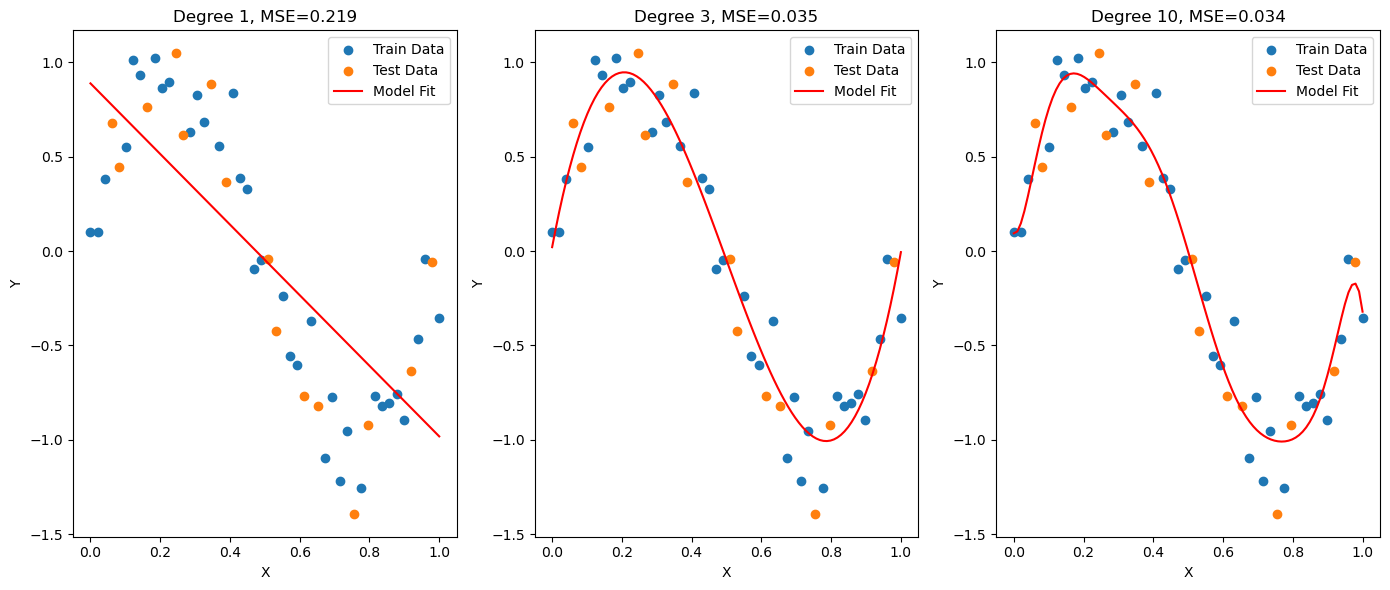

Interpretation:
Model complexity is controlled with the 'degree' parameter.
When the degree is 1, the model is underfitted showing high bias, and the points don't fit the data well.
When the degree is 10, the model is overfitted showing high variance, and is too sensitive to training data (resulting in poor test score).
Degree 3 is the ideal, having a good balance between bias and variance.


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate some synthetic data
np.random.seed(42)
X = np.linspace(0, 1, 50)
Y = np.sin(2 * np.pi * X) + np.random.normal(0, 0.2, 50)
X= X.reshape(-1, 1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


degrees = [1, 3, 10]
plt.figure(figsize=(14, 6))

for i, degree in enumerate(degrees):
    # Polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)

    # Plot the fitted function
    X_plot = np.linspace(0, 1, 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    plt.subplot(1, 3, i + 1)
    plt.scatter(X_train, y_train, label="Train Data")
    plt.scatter(X_test, y_test, label="Test Data")
    plt.plot(X_plot, y_plot, color='red', label="Model Fit")
    plt.title(f"Degree {degree}, MSE={mse:.3f}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()

plt.tight_layout()
plt.show()

print("Interpretation:")
print("Model complexity is controlled with the 'degree' parameter.")
print("When the degree is 1, the model is underfitted showing high bias, and the points don't fit the data well.")
print("When the degree is 10, the model is overfitted showing high variance, and is too sensitive to training data (resulting in poor test score).")
print("Degree 3 is the ideal, having a good balance between bias and variance.")

## 25. Resampling Techniques <a name="resampling-techniques"></a>

**Explanation:**

Resampling techniques are powerful tools used to estimate the sampling distribution of a statistic or evaluate the performance of a model, especially when analytical solutions are difficult or the underlying data distribution is unknown.

*   **Bootstrapping:** Involves repeatedly drawing samples *with replacement* from the original dataset to create multiple "bootstrap" datasets. Statistics calculated on these bootstrap datasets (e.g., mean, standard deviation, confidence intervals) provide estimates of the variability of the original statistic.
*   **Cross-Validation (k-fold):** Partitions the dataset into *k* equally sized "folds." The model is trained *k* times, each time using *k-1* folds for training and the remaining fold for validation. This provides a robust estimate of model performance on unseen data and helps prevent overfitting.

**Takeaway for Product Analytics:** Resampling techniques are invaluable for assessing the reliability of metrics and model predictions. Bootstrapping can help estimate confidence intervals for key metrics like conversion rates, while cross-validation provides a more realistic estimate of model performance in real-world scenarios.



--- Bootstrapping ---
Estimated Mean: 4.795
95% Confidence Interval: 4.450, 5.141


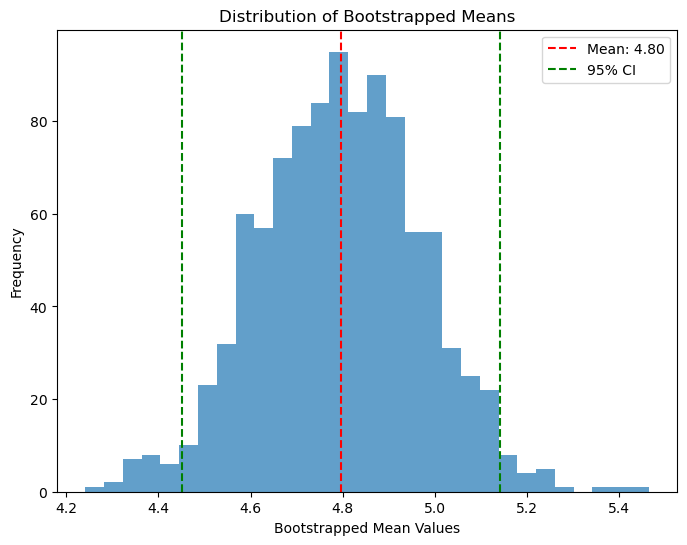


--- K-Fold Cross-Validation ---
Mean MSE across 5 folds: 0.239


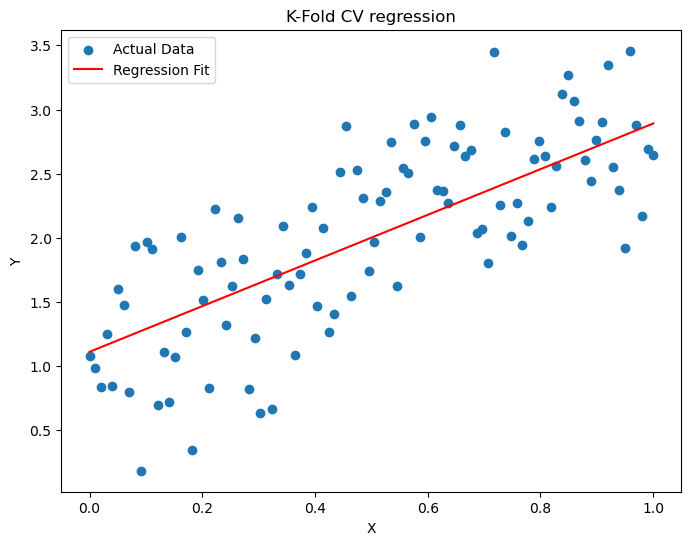

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# --- Bootstrapping ---
print("--- Bootstrapping ---")

# Generate sample data
np.random.seed(42)
data = np.random.normal(loc=5, scale=2, size=100)

# Number of bootstrap samples
n_bootstraps = 1000

# Bootstrap sampling and calculate the mean
bootstrap_means = []
for _ in range(n_bootstraps):
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Estimate the mean and confidence interval
mean_estimate = np.mean(bootstrap_means)
std_estimate = np.std(bootstrap_means)
confidence_interval = (mean_estimate - 1.96 * std_estimate, mean_estimate + 1.96 * std_estimate)

print(f"Estimated Mean: {mean_estimate:.3f}")
print(f"95% Confidence Interval: {confidence_interval[0]:.3f}, {confidence_interval[1]:.3f}")

# Plot histogram of bootstrap means
plt.figure(figsize=(8,6))
plt.hist(bootstrap_means, bins=30, alpha=0.7)
plt.axvline(mean_estimate, color="red", linestyle="dashed", label=f"Mean: {mean_estimate:.2f}")
plt.axvline(confidence_interval[0], color="green", linestyle="dashed", label=f"95% CI")
plt.axvline(confidence_interval[1], color="green", linestyle="dashed")
plt.xlabel("Bootstrapped Mean Values")
plt.ylabel("Frequency")
plt.title("Distribution of Bootstrapped Means")
plt.legend()
plt.show()


# --- K-Fold Cross-Validation ---
print("\n--- K-Fold Cross-Validation ---")

# Generate sample data for linear regression
X = np.linspace(0, 1, 100).reshape(-1, 1)
Y = 2 * X.squeeze() + 1 + np.random.normal(0, 0.5, 100)

# Number of folds
k = 5

# Initialize KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store scores for each fold
mse_scores = []

# Iterate over the folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate the MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Print average MSE
print(f"Mean MSE across {k} folds: {np.mean(mse_scores):.3f}")

#Plot predicted vs actual
plt.figure(figsize=(8,6))
plt.scatter(X, Y, label="Actual Data")
X_plot = np.linspace(0,1,100).reshape(-1,1)
y_plot = model.predict(X_plot)
plt.plot(X_plot, y_plot, color='red', label="Regression Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("K-Fold CV regression")
plt.legend()
plt.show()


## 26. Statistical Power and Sample Size <a name="statistical-power-and-sample-size"></a>

**Explanation:**

These concepts are crucial for designing effective experiments and ensuring that the results are statistically meaningful.

*   **Statistical Power:** The probability of correctly rejecting the null hypothesis when it is false (i.e., detecting a true effect). Typically, a power of 0.8 (80%) is desired.
*   **Sample Size:** The number of observations in a study. A larger sample size generally increases statistical power.
*   **Relationship:** Power, sample size, effect size (the magnitude of the effect you're trying to detect), and significance level (alpha) are interrelated. Given any three, you can determine the fourth.

**Takeaway for Product Analytics:** Understanding statistical power and sample size allows product analysts to design A/B tests that have a high chance of detecting meaningful changes in key metrics. It also helps avoid underpowered studies that may lead to false negatives.


In [22]:
from statsmodels.stats.power import TTestIndPower
import math

# Define the parameters
alpha = 0.05  # Significance level (Type I error)
power = 0.8   # Desired statistical power (1 - Type II error)
effect_size = 0.3  # Estimated effect size, must be given by us (difference between two means)

# Calculate sample size with statsmodels power analysis tool
analysis = TTestIndPower() # indendent samples t test
sample_size = analysis.solve_power(effect_size = effect_size, power=power, alpha=alpha)
sample_size = math.ceil(sample_size) # round up

print(f"Sample Size required for each group (for alpha = {alpha}, power = {power}, effect_size = {effect_size}): {sample_size}")

# Demonstrate the relationship by calculating with different effect sizes
effect_sizes = [0.1, 0.3, 0.5]
print("\nSample size for different effect sizes (fixed alpha and power):")
for eff_size in effect_sizes:
    sample_size_eff = analysis.solve_power(effect_size = eff_size, power=power, alpha=alpha)
    sample_size_eff = math.ceil(sample_size_eff)
    print(f"Effect size = {eff_size}, Sample size needed: {sample_size_eff}")

Sample Size required for each group (for alpha = 0.05, power = 0.8, effect_size = 0.3): 176

Sample size for different effect sizes (fixed alpha and power):
Effect size = 0.1, Sample size needed: 1571
Effect size = 0.3, Sample size needed: 176
Effect size = 0.5, Sample size needed: 64



## 27. P-values and Significance Levels <a name="p-values-and-significance-levels"></a>

**Explanation:**

These are fundamental concepts in hypothesis testing.

*   **P-value:** The probability of observing the data (or more extreme data) if the null hypothesis is true. A small p-value suggests that the observed data is unlikely under the null hypothesis.
*   **Significance Level (alpha):** A predetermined threshold (typically 0.05) used to decide whether to reject the null hypothesis. If the p-value is less than alpha, the null hypothesis is rejected.

**Takeaway for Product Analytics:** P-values and significance levels provide a framework for making objective decisions based on data. It's crucial to understand the limitations of p-values and to consider the context of the problem when interpreting results.



In [23]:
from scipy import stats
import numpy as np

# Example data
np.random.seed(42)
sample_a = np.random.normal(loc=10, scale=2, size=100)
sample_b = np.random.normal(loc=10.5, scale=2, size=100)

# Perform t-test
t_stat, p_value = stats.ttest_ind(sample_a, sample_b)
print(f"T Statistic: {t_stat:.3f}")
print(f"P Value: {p_value:.3f}")


alpha = 0.05
print(f"\nSignificance Level (alpha) = {alpha}")
if p_value < alpha:
    print("Reject null hypothesis. The mean of sample B is significantly different from sample A")
else:
    print("Fail to reject null hypothesis. There is not a significant difference between sample A and sample B")

T Statistic: -2.856
P Value: 0.005

Significance Level (alpha) = 0.05
Reject null hypothesis. The mean of sample B is significantly different from sample A


## 28. Confidence Intervals <a name="confidence-intervals"></a>

**Explanation:**

A confidence interval provides a range of values within which the true population parameter is likely to lie, with a certain level of confidence (e.g., 95%).

**Takeaway for Product Analytics:** Confidence intervals provide a more informative way to present results than just point estimates. They give a sense of the uncertainty associated with the estimate and can be used to compare different groups or conditions. For example, in an A/B test, comparing the confidence intervals of the conversion rates for the control and treatment groups can help determine if the difference is statistically meaningful.


In [25]:
import numpy as np
from scipy import stats

# Sample Data
np.random.seed(42)
data = np.random.normal(loc=5, scale=2, size=100)

# Calculate sample mean and standard error
sample_mean = np.mean(data)
sample_std_error = stats.sem(data)

# Confidence Level
confidence_level = 0.95

# Calculate Margin of Error
confidence_interval = stats.t.interval(confidence_level, len(data)-1, loc=sample_mean, scale = sample_std_error)

print(f"Sample Mean: {sample_mean:.3f}")
print(f"Confidence Interval ({confidence_level * 100}%) : {confidence_interval[0]:.3f}, {confidence_interval[1]:.3f}")

# Bootstrapping example
# Generate bootstrap samples
n_bootstraps = 1000
bootstrap_means = []
for _ in range(n_bootstraps):
    sample = np.random.choice(data, size=len(data), replace=True)
    bootstrap_means.append(np.mean(sample))


# Calculate CI from bootstrapped means (2.5 and 97.5 percentiles)
lower_bound_boot = np.percentile(bootstrap_means, 2.5)
upper_bound_boot = np.percentile(bootstrap_means, 97.5)

print(f"\nBootstrapped Confidence Interval ({confidence_level * 100}%) : {lower_bound_boot:.3f}, {upper_bound_boot:.3f}")

Sample Mean: 4.792
Confidence Interval (95.0%) : 4.432, 5.153

Bootstrapped Confidence Interval (95.0%) : 4.455, 5.126



## 29. Correlation (Pearson and Spearman) <a name="correlation-pearson-and-spearman"></a>

**Explanation:**

Correlation measures the strength and direction of the relationship between two variables.

*   **Pearson Correlation:** Measures the *linear* relationship between two continuous variables. Sensitive to outliers.
*   **Spearman Correlation:** Measures the *monotonic* relationship between two variables (whether they tend to move in the same or opposite directions), regardless of linearity. More robust to outliers than Pearson correlation.

**Takeaway for Product Analytics:** Correlation analysis can identify relationships between user behavior and product features. However, it's essential to remember that correlation does not imply causation.

```python
# Code implementation will go here
```

---



## 30. Linear Regression (Simple and Multiple) <a name="linear-regression"></a>

**Explanation:**

Linear regression models the linear relationship between a dependent variable and one or more independent variables.

*   **Simple Linear Regression:** One independent variable.
*   **Multiple Linear Regression:** Multiple independent variables.
*   **Interpretation of Coefficients:** The coefficients represent the change in the dependent variable for a one-unit change in the independent variable, holding other variables constant (in multiple regression).
*   **R-squared:** Measures the proportion of variance in the dependent variable explained by the model.

**Takeaway for Product Analytics:** Linear regression can be used to predict user behavior, understand the impact of different factors on key metrics, and identify areas for product optimization.

Simple Linear Regression Example:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     968.9
Date:                Mon, 23 Dec 2024   Prob (F-statistic):           1.31e-52
Time:                        21:25:59   Log-Likelihood:                -200.46
No. Observations:                 100   AIC:                             404.9
Df Residuals:                      98   BIC:                             410.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4

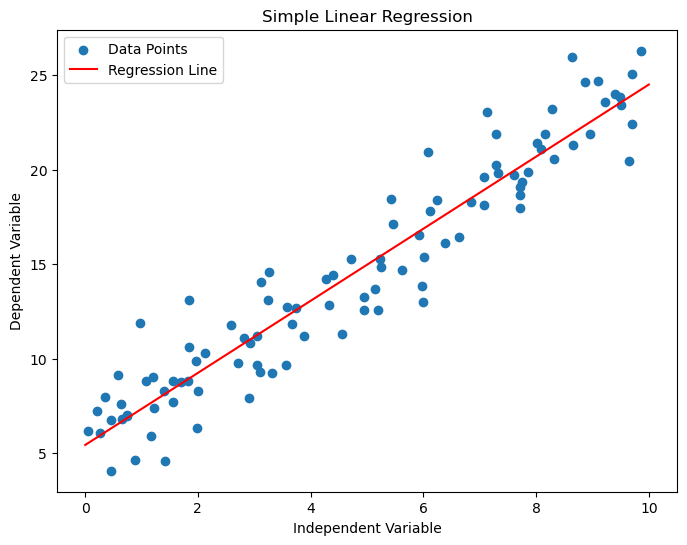


Multiple Linear Regression Example:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     228.5
Date:                Mon, 23 Dec 2024   Prob (F-statistic):           2.00e-37
Time:                        21:25:59   Log-Likelihood:                -210.46
No. Observations:                 100   AIC:                             426.9
Df Residuals:                      97   BIC:                             434.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

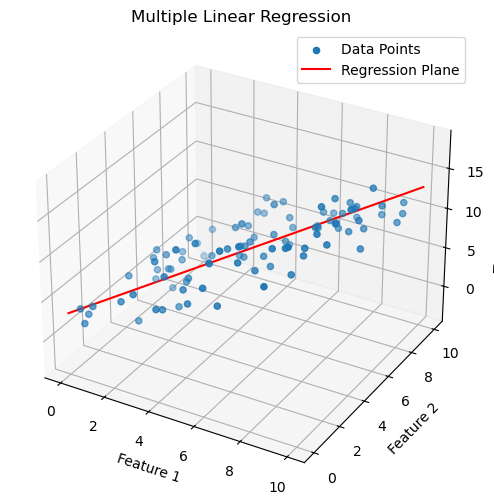

Interpretation:
Both simple and multiple regression models can be fitted.
The summary table shows the coefficents of the fitted models, and the R-squared value (measures model fit).
The multiple linear regression plot shows how the plane fits the 3D data.


In [26]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# --- Simple Linear Regression ---
print("Simple Linear Regression Example:")
# Generate some data
np.random.seed(42)
X = np.random.rand(100) * 10  # Independent variable
true_slope = 2
true_intercept = 5
Y = true_slope * X + true_intercept + np.random.normal(0, 2, 100)  # Dependent variable with noise

# Add constant for the intercept
X = sm.add_constant(X)

# fit the model
model = sm.OLS(Y, X)
results = model.fit()

# Print results
print(results.summary())

#Plot the data and regression line
x_values = np.linspace(0,10, 100)
x_values_const= sm.add_constant(x_values)
predicted_values= results.predict(x_values_const)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 1], Y, label="Data Points") #X is array with constant, plot the second column
plt.plot(x_values, predicted_values, label="Regression Line", color='red')
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


# --- Multiple Linear Regression ---
print("\nMultiple Linear Regression Example:")

# Generate multiple features
X = np.random.rand(100, 2) * 10
true_coef = [1.5, -0.5] # coefficients for multiple variables
true_intercept = 3
y_multiple = np.dot(X, true_coef) + true_intercept + np.random.normal(0, 2, 100) # Dependent

# Add constant for the intercept
X = sm.add_constant(X)
model_multiple = sm.OLS(y_multiple, X)
results_multiple = model_multiple.fit()
print(results_multiple.summary())

#Create new model using sklearn to predict data
model_sklearn = LinearRegression()
model_sklearn.fit(X[:, 1:], y_multiple)

# Predict with new model
x_plot_2d = np.linspace(0, 10, 100).reshape(-1, 1)
x_plot_2d_expanded = np.concatenate((x_plot_2d, x_plot_2d), axis=1)
y_plot_multiple = model_sklearn.predict(x_plot_2d_expanded)

plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 1], X[:, 2], y_multiple, label="Data Points")
ax.plot3D(x_plot_2d.squeeze(), x_plot_2d.squeeze(), y_plot_multiple, label='Regression Plane', color='red')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target Variable')
ax.set_title("Multiple Linear Regression")
ax.legend()
plt.show()

print("Interpretation:")
print("Both simple and multiple regression models can be fitted.")
print("The summary table shows the coefficents of the fitted models, and the R-squared value (measures model fit).")
print("The multiple linear regression plot shows how the plane fits the 3D data.")